In [10]:
import cv2
# 读取保存的图片 （图片在当前目录下。如果不在当前目录，使用绝对路径。）
image = cv2.imread('ver.png') 


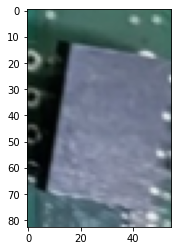

In [11]:
import matplotlib.pyplot as plt
# 把图片从BGR格式转换为RGB格式
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 显示图片
plt.imshow(image)
plt.show()

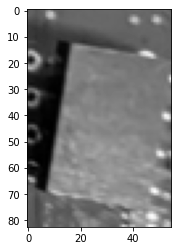

In [12]:
# 将图片转换为灰色
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# 显示图片
plt.imshow(image_gray, cmap='gray')
plt.show()

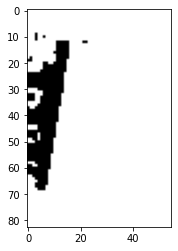

In [13]:
# 将图片通过固定的阈值进行二值化
_, image_gray = cv2.threshold(image_gray, 50, 255, cv2.THRESH_BINARY)

# 显示图片
plt.imshow(image_gray, cmap='gray')
plt.show()

In [14]:
# 保存图片至指定的路径
cv2.imwrite("jupyter/image_gray.png", image_gray)

False

In [221]:
# edges = cv2.Canny(image_gray, 50, 150, apertureSize=3)  # apertureSize是sobel算子大小，只能为1,3,5，7

# # 显示图片
# plt.imshow(edges, cmap='gray')
# plt.show()


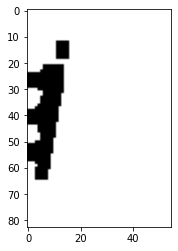

In [15]:
kernel_for_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
close_gray = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel_for_closing, iterations=1)

# 显示图片
plt.imshow(close_gray, cmap='gray')
plt.show()


In [223]:
upper = [close_gray.shape[0], 0]
lower = [0, 0]
for i in range(close_gray.shape[0]):
    for j in range(close_gray.shape[1]):
        if close_gray[i][j] == 0:
            if i <= upper[0]:
                upper = [i, j]
            elif i >= lower[0]:
                lower = [i, j]
            # upper = [min(upper[0], i), max(upper[1], j)]
            # lower = [max(lower[0], i), max(lower[1], j)]

print(upper, lower)

[12, 15] [64, 7]


In [224]:
import numpy as np

angle = np.arctan( abs(upper[1] - lower[1]) / abs(upper[0] - lower[0]) )
print(angle)

0.15264932839526515


In [225]:
# for line in lines:
#         x1,y1,x2,y2 = line[0]
#         cv2.line(close_gray,(x1,y1),(x2,y2),(0,0,255),1)
# print(lines)
# plt.imshow(close_gray, cmap='gray')
# plt.show()